# Your First Neural Network

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras import Sequential, layers, Input
from mlxtend.plotting import plot_decision_regions

## (1) Generating the Moons dataset

In [14]:
# Generating
X, y = make_moons(n_samples=300, noise=0.25, random_state=0)

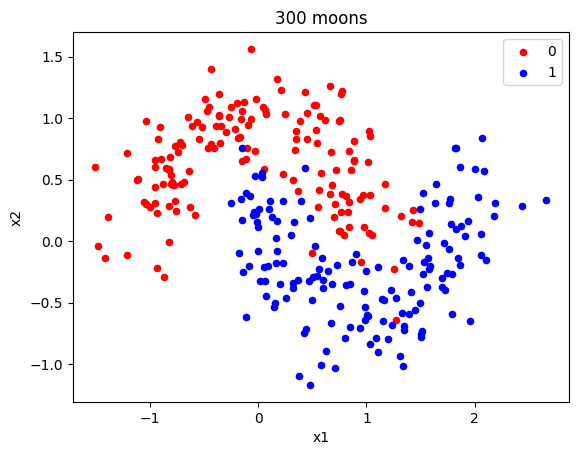

In [15]:
%matplotlib inline
def plot_moons(X, y):
    df = pd.DataFrame(dict(x1=X[:, 0], x2=X[:, 1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')

    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
    
    plt.title(f"{len(X)} moons")
    plt.show()

plot_moons(X, y)

--------------------------------------------------
noise = 0.0


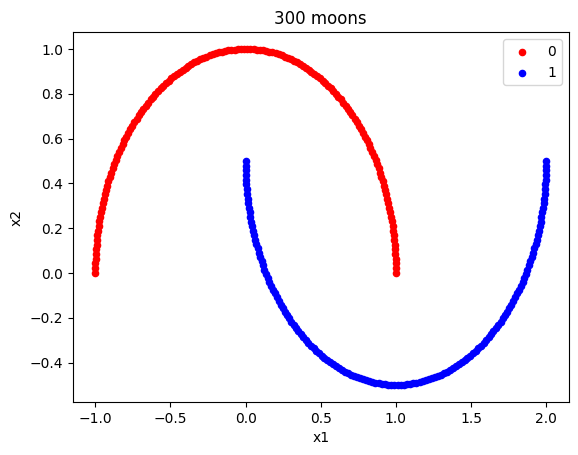

--------------------------------------------------
noise = 0.1


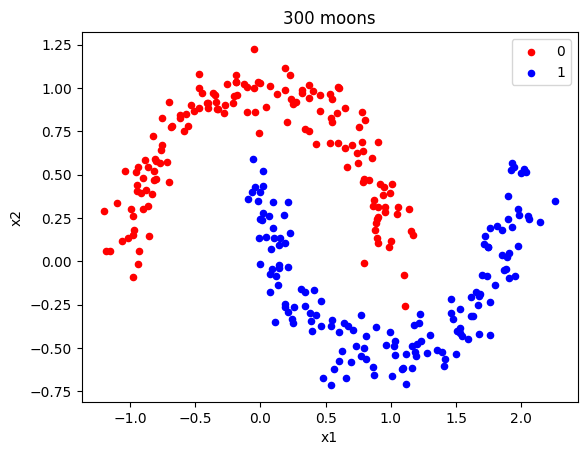

--------------------------------------------------
noise = 0.25


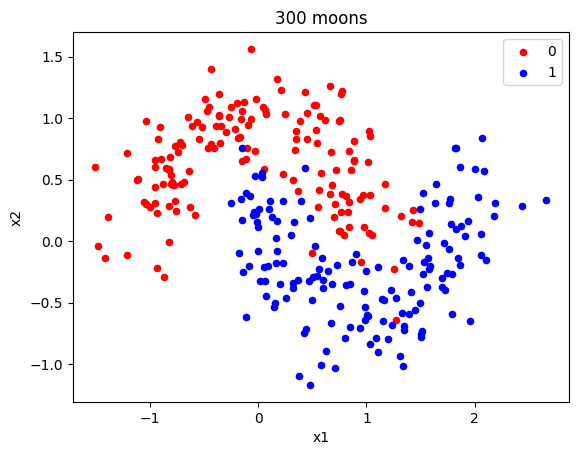

--------------------------------------------------
noise = 0.4


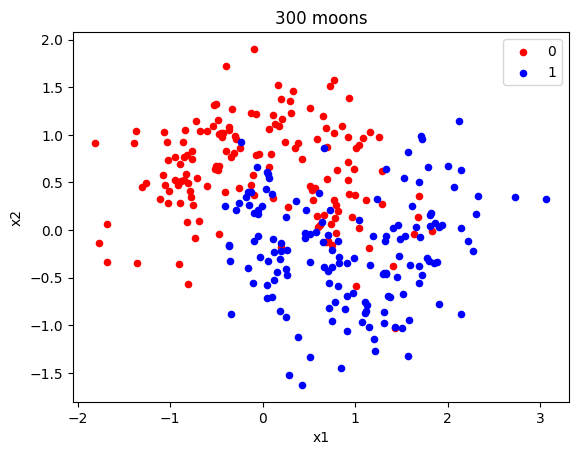

--------------------------------------------------
noise = 0.5


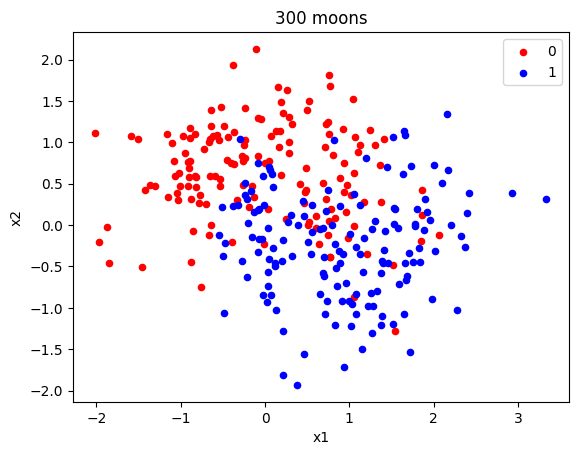

--------------------------------------------------
noise = 0.8


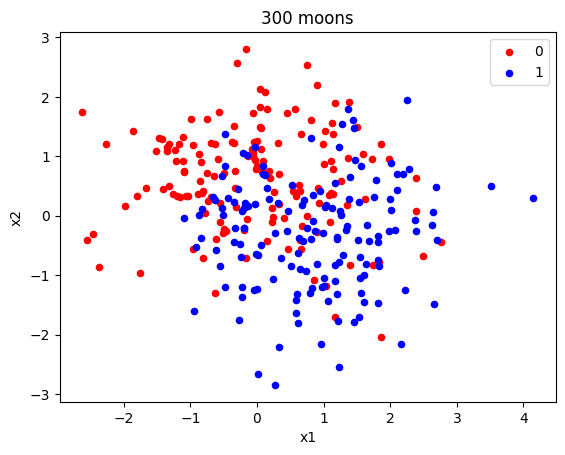

In [17]:
# Playing with the noise
for noise in [0., 0.1, 0.25, 0.4,  0.5, 0.8]:
    X, y = make_moons(n_samples=300, noise=noise, random_state=0)
    print("-"*50)
    print(f"noise = {noise}")
    plot_moons(X, y)

--------------------------------------------------


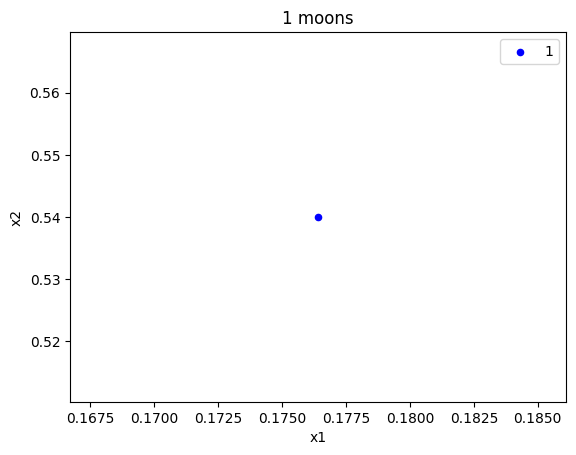

--------------------------------------------------


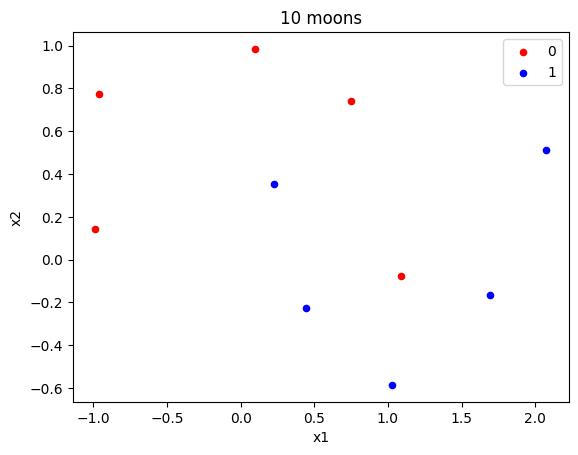

--------------------------------------------------


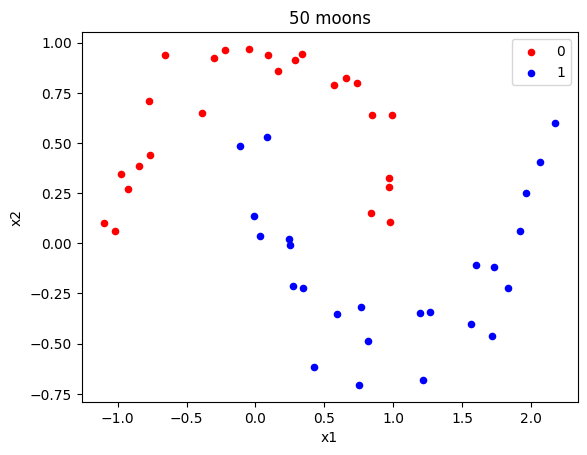

--------------------------------------------------


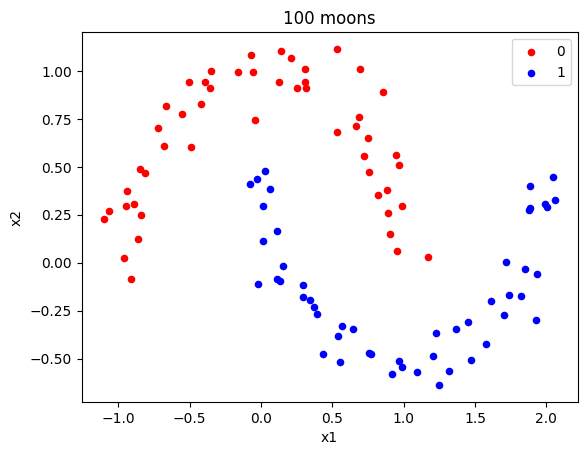

--------------------------------------------------


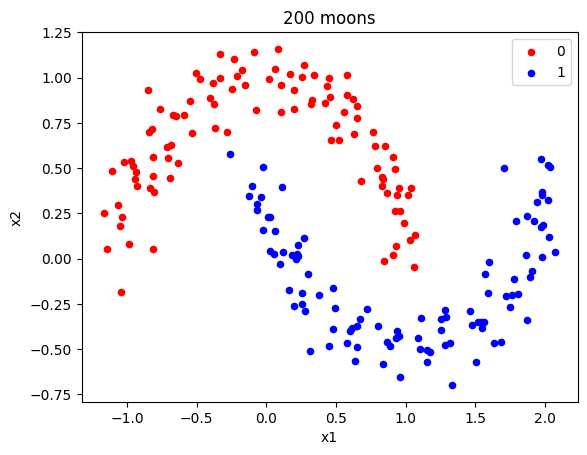

--------------------------------------------------


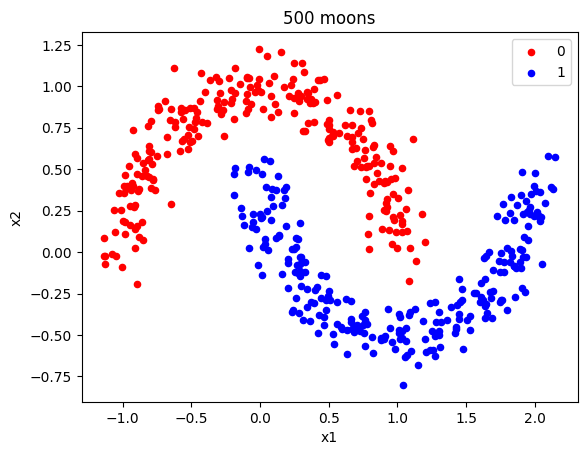

In [18]:
# Playing with the number of samples
for n_samples in [1,10,50,100,200,500]:
    X, y = make_moons(n_samples=n_samples, noise=0.1, random_state=0)
    print("-"*50)
    plot_moons(X, y)

In [20]:
X, y = make_moons(n_samples=250, noise=0.2, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((175, 2), (75, 2), (175,), (75,))

## (2) Designing a basic NN for a binary classification task

In [23]:
model = Sequential()
model.add(Input(shape=(2,)))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
              optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
              metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

## (3) Training your Neural Network

In [38]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0) # Try different verbose levels
history.__dict__

{'params': {'verbose': 0, 'epochs': 100, 'steps': 11},
 '_model': <Sequential name=sequential, built=True>,
 'history': {'accuracy': [0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893

In [39]:
history.history

{'accuracy': [0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005,
  0.9200000166893005

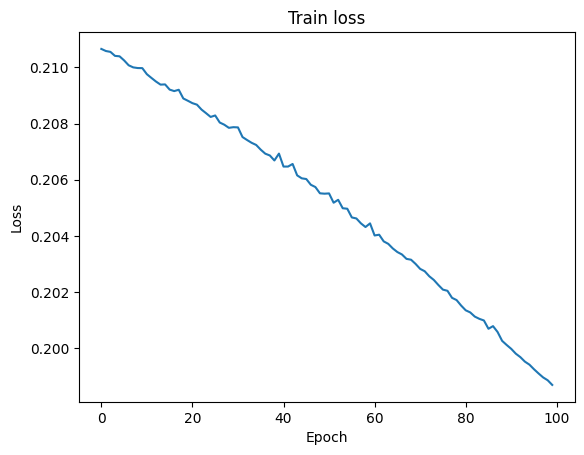

In [40]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()
plot_history(history)

## (4) Predict & Evaluate performance on test set

In [41]:
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [42]:
# Evaluating the model
res = model.evaluate(X_test, y_test, verbose=0)

# Extracting the loss and the metrics
loss = res[0]
accuracy = res[1]

print(f"loss = binary crossentropy = {loss}")
print(f"metrics = accuracy = {round(accuracy*100,2)} %")

loss = binary crossentropy = 0.24071449041366577
metrics = accuracy = 88.0 %


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 637us/step


<Axes: >

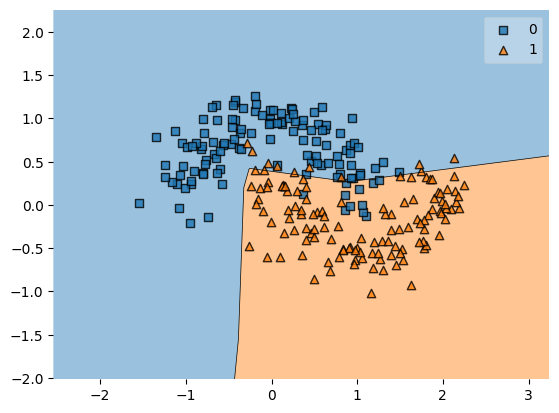

In [50]:
plot_decision_regions(X,y, model)

## (5) Training your NN with more epochs

In [51]:
model = Sequential()
model.add(Input(shape=(2,)))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
              optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
              metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced

history = model.fit(X_train, y_train, epochs=500, batch_size=16, verbose=0) # Try different verbose levels
history.__dict__

{'params': {'verbose': 0, 'epochs': 500, 'steps': 11},
 '_model': <Sequential name=sequential_1, built=True>,
 'history': {'accuracy': [0.7771428823471069,
   0.7771428823471069,
   0.7771428823471069,
   0.7885714173316956,
   0.7942857146263123,
   0.800000011920929,
   0.800000011920929,
   0.800000011920929,
   0.800000011920929,
   0.800000011920929,
   0.800000011920929,
   0.800000011920929,
   0.800000011920929,
   0.8057143092155457,
   0.8057143092155457,
   0.8114285469055176,
   0.8171428442001343,
   0.8171428442001343,
   0.8171428442001343,
   0.8114285469055176,
   0.8114285469055176,
   0.8114285469055176,
   0.8114285469055176,
   0.8114285469055176,
   0.8171428442001343,
   0.8171428442001343,
   0.8171428442001343,
   0.8171428442001343,
   0.8171428442001343,
   0.8171428442001343,
   0.8171428442001343,
   0.8171428442001343,
   0.8171428442001343,
   0.8171428442001343,
   0.8171428442001343,
   0.822857141494751,
   0.822857141494751,
   0.822857141494751,
   0

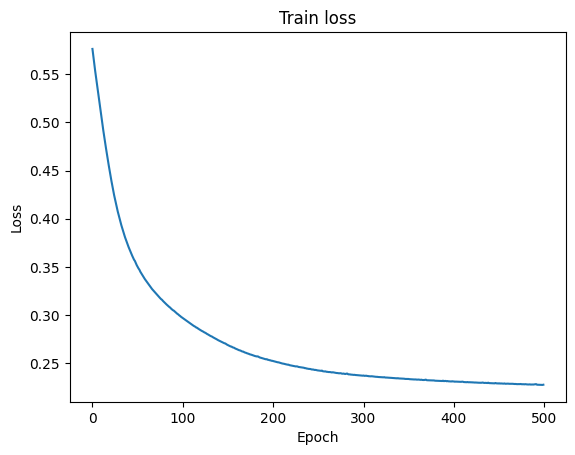

In [52]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()
plot_history(history)

In [53]:
y_pred = model.predict(X_test)

# Evaluating the model
res = model.evaluate(X_test, y_test, verbose=0)

# Extracting the loss and the metrics
loss = res[0]
accuracy = res[1]

print(f"loss = binary crossentropy = {loss}")
print(f"metrics = accuracy = {round(accuracy*100,2)} %")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
loss = binary crossentropy = 0.2718938887119293
metrics = accuracy = 85.33 %


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 736us/step


<Axes: >

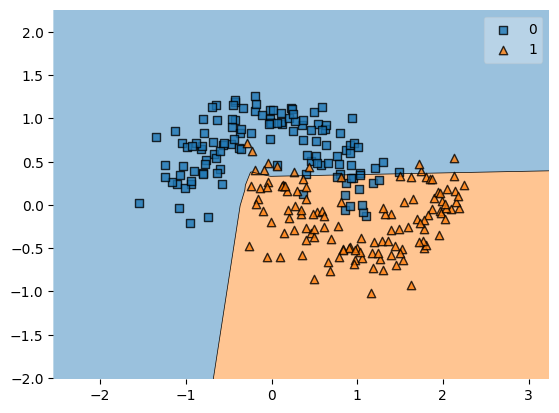

In [54]:
plot_decision_regions(X,y, model)

## (6) A Deeper Deep Learning Model

In [59]:
deep_model = Sequential()
deep_model.add(Input(shape=(2, )))
deep_model.add(layers.Dense(20, activation='relu'))
deep_model.add(layers.Dense(10, activation='relu'))
deep_model.add(layers.Dense(5, activation='relu'))
deep_model.add(layers.Dense(1, activation='sigmoid'))

deep_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=500, batch_size=8, verbose=0)
history.__dict__

{'params': {'verbose': 0, 'epochs': 500, 'steps': 22},
 '_model': <Sequential name=sequential_1, built=True>,
 'history': {'accuracy': [0.9142857193946838,
   0.9142857193946838,
   0.9142857193946838,
   0.9142857193946838,
   0.9142857193946838,
   0.9142857193946838,
   0.9142857193946838,
   0.9142857193946838,
   0.9142857193946838,
   0.9142857193946838,
   0.9142857193946838,
   0.9142857193946838,
   0.9142857193946838,
   0.9142857193946838,
   0.9142857193946838,
   0.9142857193946838,
   0.9142857193946838,
   0.9142857193946838,
   0.9142857193946838,
   0.9142857193946838,
   0.9142857193946838,
   0.9142857193946838,
   0.9142857193946838,
   0.9142857193946838,
   0.9142857193946838,
   0.9142857193946838,
   0.9142857193946838,
   0.9142857193946838,
   0.9142857193946838,
   0.9142857193946838,
   0.9142857193946838,
   0.9142857193946838,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.9200000166893005,
   0.92000001668

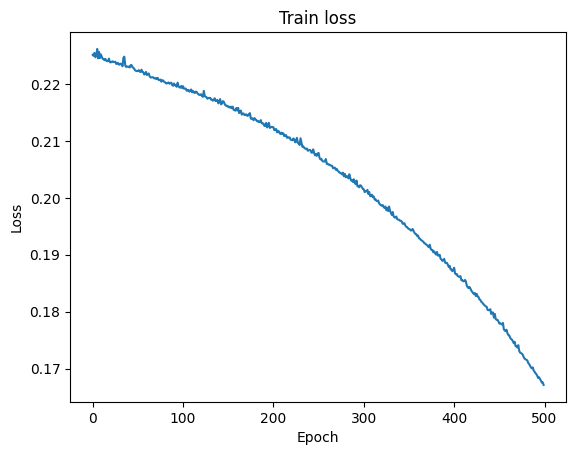

In [60]:
plot_history(history)

In [61]:
# Evaluating the model
res = model.evaluate(X_test, y_test, verbose=0)

# Extracting the loss and the metrics
loss = res[0]
accuracy = res[1]

print(f"loss = binary crossentropy = {loss}")
print(f"metrics = accuracy = {round(accuracy*100,2)} %")

loss = binary crossentropy = 0.2143082618713379
metrics = accuracy = 88.0 %


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 684us/step


<Axes: >

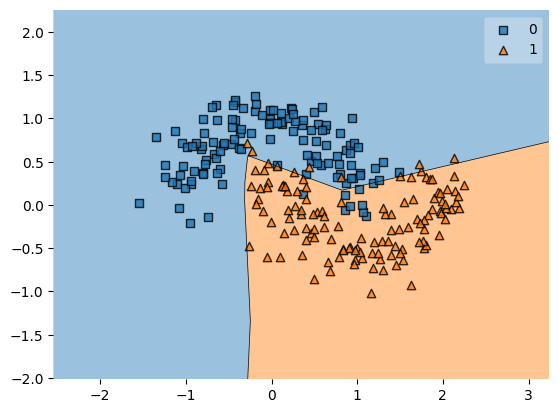

In [62]:
plot_decision_regions(X,y, model)